Code of Academic Integrity
* I affirm that
* This work is my own original work and is not a borrowed work,

*   This work is my own original work and is not a borrowed work, either from other students or from assignments for other courses.

*   I have not given or received any unauthorized help on this assignment.

*   This submission is free from Plagiarism, Fabrication of facts, Unauthorized assistance, collusion

*   This submission gives proper credit to sources and references, acknowledges the contributions and ideas of others relevant to this academic work.

*   This submission was prepared by me fully adhering to the rules that govern this assignment regarding resource material, electronic aids, copying, collaborating with others, or engaging in any other behavior that subverts the purpose of the assignment and the directions of the teacher.



# **Lab Practice Sheet 10**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
#Import for decision tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

**For the LPS 10 I have completed 5 questions which are: 1(a), 2(a), 2(b), 2(c) and 2(d)** 

## Custom Functions

In [ ]:
def svmmodel(df,X , Y, n_model, n_degree, isPlot=False, n_x = 'x', n_y = 'y'):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
  model = svm.SVC(kernel = n_model, degree= n_degree)
  model.fit(X_train, Y_train)
  test_size = int(np.round(df.shape[0] *0.2,0))+1
  if(isPlot):
    fig, ax = plt.subplots(figsize=(12, 7))# Removing to and right border
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)# Create grid to evaluate model
    xx = np.linspace(-1, max(df[n_x]) + 1, len(X_train))
    yy = np.linspace(0, max(df[n_y]) + 1, len(Y_train))
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    train_size = len(df[:-test_size][n_x])# Assigning different colors to the classes
    colors = Y_train
    colors = np.where(colors == 1, '#8C7298', '#4786D1')# Plot the dataset
    ax.scatter(df[:-test_size][n_x], df[:-test_size][n_y], c=colors)#Get the separating hyperplane
    #Z = model.decision_function(xy).reshape(XX.shape)
    # Draw the decision boundary and margins
    #ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])# Highlight support vectors with a circle around them
    #ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.show()
  predictions_poly = model.predict(X_test)
  accuracy_poly = accuracy_score(Y_test, predictions_poly)
  print(str(n_degree) + " th degree "+ str(n_model)+"\nAccuracy (normalized): " + str(accuracy_poly))
  print(classification_report(predictions_poly, Y_test))
  return model


In [ ]:
def headmap(df):
  plt.figure(figsize=(12,8))
  sns.heatmap(df.corr(), annot = True, cmap ='RdPu')
  plt.show()

In [ ]:
def logisticRegression(X, Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
  logit_model = LogisticRegression(C = 10, max_iter=100, solver='liblinear',tol=0.001,random_state=0)
  logit_model.fit(X_train, Y_train)
  print("Logistic Model Score: ", logit_model.score(X_test, Y_test))
  predictions = logit_model.predict(X_test)
  confusion_matrix(Y_test, predictions)
  sns.heatmap(confusion_matrix(Y_test, predictions), annot = True, fmt='0.0f')
  print(classification_report(Y_test, predictions))
  return logit_model

In [ ]:
def DecisionTreeModel(X, Y, isPlot = False):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2, random_state = 3)
  clf_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 9)
  clf_tree.fit(X_train, Y_train)
  Y_Pred = clf_tree.predict(X_test)
  report = classification_report(Y_Pred, Y_test)
  print("Decision Tree Score: ",clf_tree.score(X_test, Y_test))
  print(report)
  if(isPlot):
    dot_data = StringIO()
    export_graphviz(clf_tree, out_file= dot_data, feature_names=list(X.columns), filled = True, rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))
  return clf_tree

In [ ]:
def RandomForestModel(X,Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2, random_state = 3)
  rfc = RandomForestClassifier(n_estimators=100,bootstrap=False)
  rfc.fit(X_train, Y_train)
  y_pred = rfc.predict(X_test)
  print("Random Forest Score: ", accuracy_score(Y_test, y_pred))
  report = classification_report(y_pred, Y_test)
  print(report)
  return rfc

In [ ]:
def MultiLayerPerceptionModel(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=5)
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='sgd', max_iter=1000)
  mlp.fit(X_train, y_train.values.ravel())
  predictions = mlp.predict(X_test)
  print("Multi Layer Perception Model Score: ", accuracy_score(y_test, predictions))
  print(confusion_matrix(y_test,predictions))
  print(classification_report(y_test,predictions))
  return mlp

In [ ]:
# For both linear and multiple regression
def LinaerRegressorModel(X,Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
  slm = LinearRegression()
  slm.fit(X_train, Y_train)
  print("Intercept: ", slm.intercept_)
  print("Slope: ", slm.coef_)
  Y_Pred = slm.predict(X_test)
  Y_pred_train = slm.predict(X_train)
  rmse_mlreg = np.sqrt(mean_squared_error(Y_Pred, Y_test)**2)
  print("Root mean squared error is: ", rmse_mlreg)
  r2_score_mlreg_train = r2_score(Y_pred_train, Y_train)
  r2_score_mlreg_val = r2_score(Y_Pred, Y_test)
  print('r2_ score for train dataset : ', r2_score_mlreg_train)
  print('r2_ score for test dataset : ', r2_score_mlreg_val)
  return slm

## 1. Regression models (for the following two questions, take the same data set.)


### Pulling the dataset

In [ ]:
mydf = pd.read_csv("https://raw.githubusercontent.com/Shush25/myDatasets/main/USA_Housing.csv")
mydf.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
mydf.shape

(5000, 7)

In [ ]:
mydf.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
X = mydf.drop(['Price','Address'], axis =1)
Y = mydf['Price']

In [ ]:
reg_pre_arr = [[61287.053179, 5.043143, 6.313321, 3.31, 12344.612343],
               [53134.632179, 2.040512, 3.612121, 4.61, 62312.351321],
               [83512.065379, 3.041234, 9.513221, 6.52, 12345.531234],
               [56287.061329, 6.040515, 9.342121, 3.23, 35213.811235],
               [67287.067349, 8.042345, 6.112341, 7.12, 51233.523123]]

### (a) Train a Normal equation based SKlearn regressor with the chosen data set and predict the outcome for a five test data. Compute the parameters of the model and the performance measure of the model.

In [ ]:
mlr = LinaerRegressorModel(X,Y)

Intercept:  -2655173.6764567527
Slope:  [2.16556900e+01 1.66148583e+05 1.21844974e+05 1.08878675e+03
 1.52831894e+01]
Root mean squared error is:  10919017828.442081
r2_ score for train dataset :  0.9145429234280628
r2_ score for test dataset :  0.8977236601051003


In [ ]:
mlr.predict(reg_pre_arr)

array([ 471466.17972558,  231991.18818329, 1013550.59110894,
       1247371.10294763, 1673720.2537998 ])

Inference: We get a r2 score for train dataset as .91 and r2 score for test dataset as .89 which is very good. And we also predicted the price given all the other attributes using the sklearn library.

## 2. Classification models (for the following four questions, take the same data set.)


### Pulling the Dataset

In [ ]:
mydf = pd.read_csv("https://raw.githubusercontent.com/Shush25/myDatasets/main/gender_classification_v7.csv")

In [ ]:
mydf.shape

(5001, 8)

In [ ]:
mydf.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
mydf.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
pre_arr = [[1, 11.3, 6.1, 1, 0, 1, 1],
           [0, 13.2, 7.4, 0, 0, 0, 1],
           [1, 8.4, 5.9, 0, 1, 1, 0],
           [0, 9.6, 8.1, 0, 1, 0, 1],
           [0, 10.4, 8.9, 1, 1, 1, 0]]

### (a) Train a SVM based SKlearn Classifier with the chosen data set and predict the class for five test data. Compute the parameters of the model and the performance measure of the model.

In [ ]:
X = mydf.drop(['gender'], axis =1)
Y = mydf['gender']

In [ ]:
svmodel = svmmodel(mydf,X,Y, 'poly', 2, False)

2 th degree poly
Accuracy (normalized): 0.964035964035964
              precision    recall  f1-score   support

      Female       0.95      0.98      0.96       471
        Male       0.98      0.95      0.97       530

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



In [ ]:
print(svmodel.predict(pre_arr))

['Male' 'Female' 'Female' 'Female' 'Male']


### (b) Train a logistic regression based SKlearn Classifier with the chosen data set and predict the class for five test data. Compute the parameters of the model and the performance measure of the mode

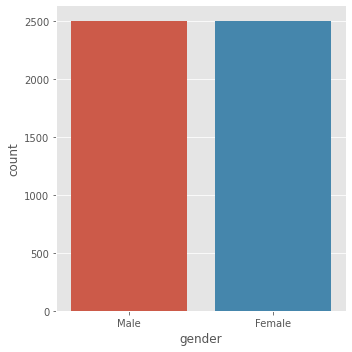

In [ ]:
plt.style.use('ggplot')
sns.catplot(x = 'gender', kind = 'count', data=mydf)

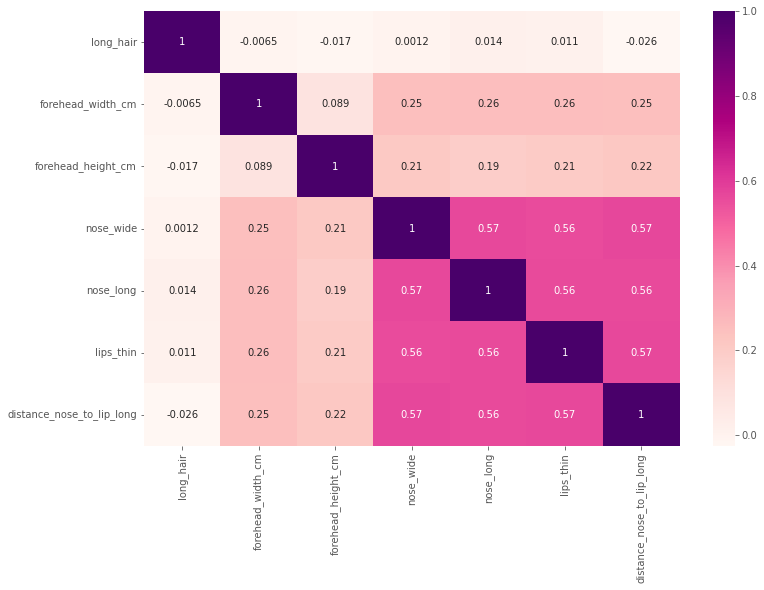

In [ ]:
headmap(mydf)

Logistic Model Score:  0.968031968031968
              precision    recall  f1-score   support

      Female       0.96      0.97      0.97       487
        Male       0.97      0.96      0.97       514

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



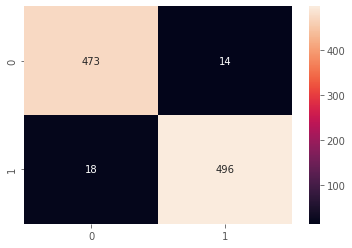

In [ ]:
logit_model = logisticRegression(X,Y)

In [ ]:
logit_model.predict(pre_arr)

array(['Male', 'Female', 'Female', 'Male', 'Male'], dtype=object)

### (c) Train a decision tree based SKlearn Classifier with the chosen data set and predict the class for five test data. Compute the parameters of the model and the performance measure of the model

#### Decision Tree

Decision Tree Score:  0.968031968031968
              precision    recall  f1-score   support

      Female       0.97      0.97      0.97       504
        Male       0.97      0.97      0.97       497

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



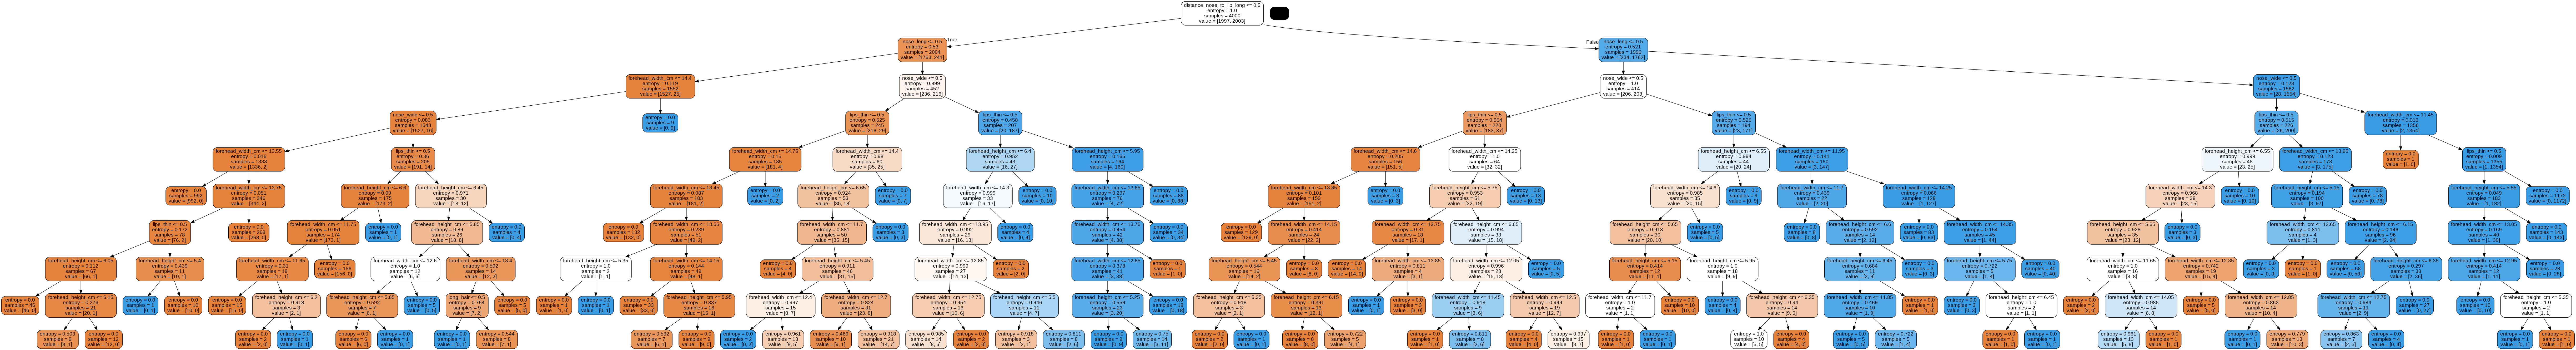

In [ ]:
decision_tree_model = DecisionTreeModel(X,Y,True)

In [ ]:
decision_tree_model.predict(pre_arr)

array(['Male', 'Female', 'Female', 'Male', 'Male'], dtype=object)

#### Random Forest

In [ ]:
random_forest_model = RandomForestModel(X,Y)

Random Forest Score:  0.967032967032967
              precision    recall  f1-score   support

      Female       0.97      0.96      0.97       509
        Male       0.96      0.97      0.97       492

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [ ]:
random_forest_model.predict(pre_arr)

array(['Male', 'Male', 'Female', 'Male', 'Male'], dtype=object)

### (d) Train a Multi Layer Perceptron based SKlearn Classifier with the chosen data set and predict the class for five test data. Compute the parameters of the model and the performance measure of the model.


In [ ]:
mlp_model = MultiLayerPerceptionModel(X,Y)

Multi Layer Perception Model Score:  0.967032967032967
[[474  13]
 [ 20 494]]
              precision    recall  f1-score   support

      Female       0.96      0.97      0.97       487
        Male       0.97      0.96      0.97       514

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [ ]:
mlp_model.predict(pre_arr)

array(['Male', 'Male', 'Male', 'Male', 'Male'], dtype='<U6')

### Inference

From the Above experiments we can clearly observe that the logistic regression based model as well as decision tree model has the best accuracy score out of all the other models. Also decision tree model shows the best precision out of all the other model for our dataset.